# Universidad Nacional de Colombia  
## Sede Bogotá  
### Facultad de Ingieneria
### Departamento de ingieneria de sistemas e industrial

---

## **Taller de Modelos y Simulación**

**Título del Taller:**  
*Taller 1*

**Estudiantes:**  
*Jare Mijail Ramirez Escalante*
*Juan Jeronimo Gomez*  
*Sergio*
*Laura Sofia*

**Grupo:**  
*03*

**Periodo:**  
*2025-1*

**Fecha de entrega:**  
*mayo 02/2025*

---


# Generacion de Variables Aleatorias

---

## Marco Teorico

Para explicar de forma correcta la transformada inversa y los temas siguientes vamos a realizar un repaso de algunos conceptos basicos de estadistica.

### Variables Aleatorias

Una variable aleatoria es una función que permite ir de un conjunto omega (el conjunto de los eventos) a un conjunto numérico, osea le asigna un número real a cada resultado de un experimento aleatorio.

$$
X: \Omega \rightarrow \mathbb{R}
$$

donde:

- $(\Omega)$ es el espacio muestral del experimento aleatorio.

- $(\mathbb{R})$ representa el conjunto de los números reales.

- $(X(\omega))$ es el valor numérico asignado al resultado $(\omega)$.


### Distribucion de probabilidad

Una distribución de probabilidad le asigna a cada valor posible de una variable aleatoria la probabilidad de que dicho valor ocurra. Es decir, le asigna a cada número real —al cual se le ha asociado previamente, a través de la variable aleatoria, como preimagen un evento— la probabilidad de que ese evento ocurra.

Esta puede ser discreta o continua, y a partir de ella se pueden calcular medidas de centralidad como el promedio o la moda, así como también medidas de dispersión (como el rango, la varianza, etc.) y medidas de posición, como los cuartiles.

Dependiendo de si tenemos una distribución discreta o continua, se utiliza una función de masa de probabilidad (PMF) o una función de densidad de probabilidad (PDF), respectivamente. Sin embargo, a partir de estas funciones no siempre se puede obtener directamente una probabilidad, sino que esta se calcula a través de la función de distribución acumulada.

La función de distribución acumulada (CDF) sí entrega probabilidades reales, ya que proporciona el valor acumulado de las mismas. Esta función se obtiene como una sumatoria (en el caso discreto) o una integral (en el caso continuo) sobre la función de masa o densidad de probabilidad.

####  Distribución discreta

Cuando la variable aleatoria es **discreta**, se define una **función de masa de probabilidad (PMF)**:

$$
P(X = x_i) = p(x_i)
$$

Y se cumple que:

$$
\sum_{i} p(x_i) = 1
$$

####  Distribución continua

Cuando la variable aleatoria es **continua**, se define una **función de densidad de probabilidad (PDF)**:

$$
f(x) \geq 0 \quad \text{para todo } x
$$

Y el área total bajo la curva es:

$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$

La probabilidad de que la variable esté en un intervalo se calcula como:

$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

#### Distribucion Triangular

Esta distribucion se caracteriza por contar con puntos a, b y c, de los cuales a es el minimo, b el maximo y c la moda

Su funcion de densidad de probabilidad es la siguiente:

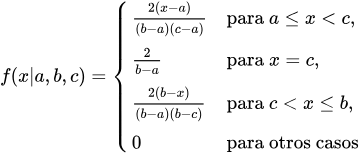

Y su funcion de probabilidad acumulada es:

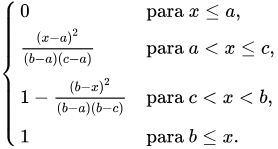

#### Distribucion Trapezoidal

### 1. Metodo Transformada Inversa

Es un metodo utilizado para la generacion de numeros aleatorios, de cualquier distribucion de probabilidad continua, cuando se conoce la inversa de su funcion de distribucion acumulada.

Para este metodo

1. Se genera un numero aleatorio u apartir de la distribucion uniforme en el intervalo (0,1)

2. Se halla la inversa de la funcion de distribucion F

3. Se calcula X, dandole a la inversa de F el valor u

### 2. Metodo de composicion

### 3. Metodo de rechazo

## Desarrolar algoritmos correspondientes

### 1. Desarrollar los algoritmos correspondientes al: 


Para las siguientes graficas realizar dos metodos de generacion de variables aleatorias.

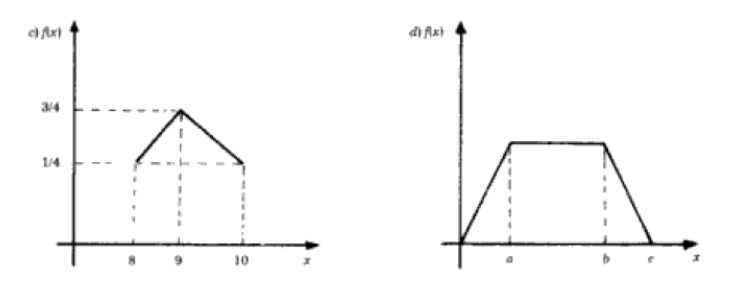

#### a) método de la transformada inversa

##### primera grafica

Para la primera grafica tenemos una distribucion triangular, ya vimos como es su funcion de distribucion acumulada, de forma que necesitamos la inversa de esta funcion lo que corresponde a:

$$
F^{-1}(u) =
\begin{cases}
a + \sqrt{u (b - a)(c - a)} & \text{si } u < \frac{c - a}{b - a} \\
b - \sqrt{(1 - u)(b - a)(b - c)} & \text{si } u \geq \frac{c - a}{b - a}
\end{cases}
$$

ahora solo tenemos que implementar esta misma funcion en python realmente solo necesitamos escribir las dos formulas y un condicional, esta formula es general de forma que esta funcion de python va a recibir como parametros tres variables, correspondientes a las incognitas de nuestra ecuacion.


In [ ]:
import numpy as np
from numba import jit

@jit(nopython=True)
def inverse_cdf_triangular(a, b, c):
    u = np.random.uniform(0, 1)
    Fc = (c - a) / (b - a)
    if u < Fc:
        return a + np.sqrt(u * (b - a) * (c - a))
    else:
        return b - np.sqrt((1 - u) * (b - a) * (b - c))

Ahora vamos a definir nuestros puntos en variables, que recordemos solo utilizamos nuestra coordenada X

In [ ]:
a = 8 # inicio del triangulo
b = 10 # fin del triangulo
c = 9 # pico del triangulo

Ahora definimos nuestra funcion de simulacion que simplemente va a correr n veces nuestro generados de numeros aleatorios.

In [ ]:
def simulation(n, funcion):
    result = np.empty(n, dtype=np.float64)
    for i in range(n):
        result[i] = funcion()
    return result

Ahora vamos a ejecutar nuestra simulacion, vamos a ver los primeros 10 resultados y despues graficaremos nuestra distribucion.

In [ ]:
result = simulation(100000000, lambda: inverse_cdf_triangular(a, b, c))
print("Simulación de 100,000,000 muestras de la distribución triangular:")
print(result[:10]) 

Simulación de 100,000,000 muestras de la distribución triangular:
[9.50880983 9.44791059 9.11488342 8.18555565 9.85848941 8.85358403
 9.46513793 8.64477609 8.66399406 9.20301626]


In [ ]:
import matplotlib.pyplot as plt

def makeGraph(result):
    plt.hist(result, bins=1000, density=True)
    plt.title("Distribución")
    plt.xlabel("x")
    plt.ylabel("Densidad")

    plt.show()

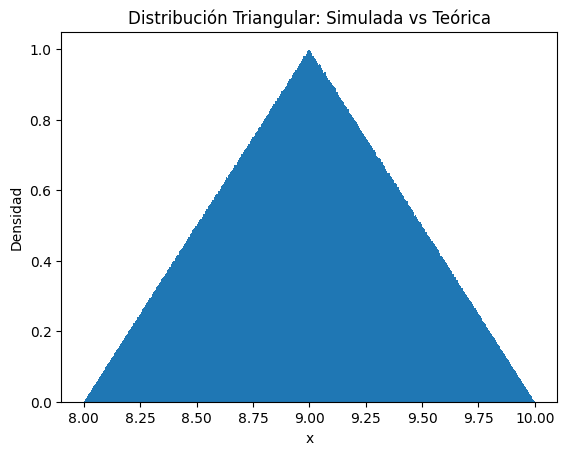

In [ ]:
makeGraph(result)

Como podemos observar hemos generado numeros aleatorios para la distribucin deseada.

##### segunda grafica

Nuestra segunda grafica es una distribucion trapezoidal por tanto realizaremos un procedimiento similar utilizando su funcion de distribucion acumulada.

In [ ]:
@jit(nopython=True)
def inverse_cdf_trapezoidal( a, b, c, d):
    u = np.random.random()
    
    h = 2 / (d + c - a - b)

    A1 = (b - a) * h / 2
    A2 = (c - b) * h
    A3 = (d - c) * h / 2

    if u < A1:
        return a + np.sqrt((2 * u * (b - a)) / h)
    elif u < A1 + A2:
        return b + (u - A1) / h
    elif u <= 1.0:
        z = u - A1 - A2
        return d - np.sqrt((2 * (A3 - z) * (d - c)) / h)
    else:
        raise ValueError("u debe estar en el intervalo [0, 1]")

In [ ]:
d = 7
result = simulation(100000000, lambda: inverse_cdf_trapezoidal(d, a, c, b))
makeGraph(result)

#### b) método de composición

# Problemas asignados a cada uno del grupo

---

### Problema numero 9
Barcos llegan a un puerto a la tasa de uno cada  1 ±  1/2    horas. Hay 6 muelles para atenderlos. Ellos también requieren  los servicios de una grúa para descargar y hay cinco de ellas. Después de descargar, 10% de los barcos permanecen para recarga de combustible antes de partir; los otros salen inmediatamente. Los barcos no requieren las grúas para la recarga. Simular las colas para los muelles  y las grúas asumiendo que toma  7(1/2)  ±  3  horas para descargar y 1  ± 1/2  horas para la recarga. Simular para que 100 barcos abandonen el puerto.